In [35]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [36]:
import sys
sys.path.append('../')
import utils_auto 

# Configuration

In [37]:
trial_idx=1
paper='1106.6060'

# Code-generation prompts

In [39]:
prompt=(utils_auto.generate_prompt(template='prompt.md',docstring='docstring.md',paper=paper,save=True,trial_idx=trial_idx))

In [40]:
print(prompt)

You are a condensed matter physicist working on the numerical calculation for the Hamiltonian of a system using the Hartree Fock method. I will provide you with the physical Hamitonian written in second quantized form as an equation in LaTeX. You should convert it into a class for the HartreeFockHamiltonian using Python and necessary packages, such as numpy and scipy.
This is a multiple-step problem, and you will execute this process by analyzing the equation and answering smaller questions sequentially in order to finally generate the class. The class has the following structure:

CLASS DOCSTRING: 
```
class HartreeFockHamiltonian:
  def __init__(self, N_shell, parameters:dict[str, Any], filling_factor: float=0.5):
    self.lattice = 'square' | 'triangular'
    self.D = # LM Task: has to define this tuple.
    self.basis_order = {'0': 'flavor_type_0', '1': 'flavor_type_1', ... 'D-1': 'flavor_type_D-1'}
    # this is the basis order that the Hamiltonian will follow

    # Occupancy rel

# LLM-Generated code

In [56]:
generated_code = utils_auto.code_generate(prompt,max_tokens=25600,budget_tokens=12800,)


#################### THINKING ####################

Alright,
Alright, let's break down this Hamiltonian to understand its structure, components, and how to implement it in a Python class.

## 1. Dimension and Basis Order:

The Hamiltonian is of the form:
\begin{equation}
  \HH_{\rm MF} = \sum_{\kk, s} \hat{C}^{\dag}_{\kk s}\HH_{\kk s}\hat{C}^{\phantom{\dag}}_{\kk s} + f(n^{p}, \eta)
\end{equation}

with $\hat{C}^{\dag}_{\kk s} = (\hat{p}^{\dag}_{x\kk s}, \hat{p}^{\dag}_{y\kk s}, \hat{d}^{\dag}_{\kk s})$.

From this, I can identify the following flavors:
1. Spin (denoted by s, which can be up ↑ or down ↓), so |spin| = 2.
2. Orbital (denoted by x, y, d), so |orbital| = 3.

So, our D tuple would be (|spin|, |orbital|) = (2, 3).

The basis order would be:
0: Spin. Order: up (s=0), down (s=1)
1: Orbital. Order: p_x (o=0), p_y (o=1), d (o=2)

## 2. Identifying Interacting Terms:

I need to identify which terms in the Hamiltonian depend on expected values. Let's examine the elements of the m

In [57]:
print(generated_code['thinking'])

Alright, let's break down this Hamiltonian to understand its structure, components, and how to implement it in a Python class.

## 1. Dimension and Basis Order:

The Hamiltonian is of the form:
\begin{equation}
  \HH_{\rm MF} = \sum_{\kk, s} \hat{C}^{\dag}_{\kk s}\HH_{\kk s}\hat{C}^{\phantom{\dag}}_{\kk s} + f(n^{p}, \eta)
\end{equation}

with $\hat{C}^{\dag}_{\kk s} = (\hat{p}^{\dag}_{x\kk s}, \hat{p}^{\dag}_{y\kk s}, \hat{d}^{\dag}_{\kk s})$.

From this, I can identify the following flavors:
1. Spin (denoted by s, which can be up ↑ or down ↓), so |spin| = 2.
2. Orbital (denoted by x, y, d), so |orbital| = 3.

So, our D tuple would be (|spin|, |orbital|) = (2, 3).

The basis order would be:
0: Spin. Order: up (s=0), down (s=1)
1: Orbital. Order: p_x (o=0), p_y (o=1), d (o=2)

## 2. Identifying Interacting Terms:

I need to identify which terms in the Hamiltonian depend on expected values. Let's examine the elements of the matrix $\HH_{\kk s}$:

\begin{equation}
  \HH_{\kk s} = \left(\

In [58]:
print(generated_code['text'])

# Analysis of Emery Model Hamiltonian

## 1) Dimension and Basis Order
Tuple of Flavors (D) = (2, 3)
Basis Order:
0: spin. Order: up (s=0), down (s=1)
1: orbital. Order: p_x (o=0), p_y (o=1), d (o=2)

## 2) Identifying Interacting Terms

EXP-VAL DEPENDENT TERMS:
- `n_p`: Sum of expectation values for p_x and p_y orbitals across both spins
- `eta`: Difference between p_x and p_y orbital occupations across both spins
- `n`: Total hole density (sum of all orbital occupations)

TERMS:
- `γ₁(kₓ)` → H[s, 0, s, 2, k] and H[s, 2, s, 0, k], NI (hopping between p_x and d)
- `γ₁(ky)` → H[s, 1, s, 2, k] and H[s, 2, s, 1, k], NI (hopping between p_y and d)
- `γ₂(k)` → H[s, 0, s, 1, k] and H[s, 1, s, 0, k], NI (hopping between p_x and p_y)
- `Δ term` → H[s, 0, s, 0, k] and H[s, 1, s, 1, k], NI (energy difference)
- `Ũₚ(n^p/4)` → H[s, 0, s, 0, k] and H[s, 1, s, 1, k], I (p-orbital interaction)
- `Ṽₚₚ(η/4)` → H[s, 0, s, 0, k] and H[s, 1, s, 1, k], I (nematic interaction)
- `Ũᵈ((n-n^p)/2)` → H[s, 2, s,

In [59]:
code = utils_auto.extract_code(generated_code['text'])

In [60]:
print(code)

import numpy as np
from typing import Any, Dict, Optional
from HF import *

class HartreeFockHamiltonian:
    """Hartree-Fock Hamiltonian for the Emery model on a square lattice.
    
    This implements the three-band Emery model with p_x, p_y and d orbitals.
    The model includes hopping between orbitals and interaction terms
    that create a self-consistent mean field problem.
    
    Args:
        N_shell (int): Number of shells in the k-space lattice.
        parameters (dict): Dictionary containing model parameters.
        filling_factor (float): Filling factor determining electron density.
    """
    def __init__(self, N_shell: int=10, parameters: Optional[Dict[str, Any]]=None, filling_factor: float=0.5):
        self.lattice = 'square'
        self.D = (2, 3)  # (spin, orbital)
        self.basis_order = {
            '0': 'spin',    # up (s=0), down (s=1)
            '1': 'orbital'  # p_x (o=0), p_y (o=1), d (o=2)
        }
        
        # Occupancy parameters
        

In [61]:
utils_auto.save_code(code,paper,trial_idx)

Code saved to code_1106_6060_1.py


# Code evaluation

In [62]:
code_path = 'code_{int}_{decimal}_{trial_idx}'.format(int=paper.split('.')[0],decimal=paper.split('.')[1],trial_idx=trial_idx) 

In [63]:
import importlib

In [64]:
module = importlib.import_module(code_path)

In [65]:
import HF

## Task 1: Check k-space

In [369]:
ham = module.HartreeFockHamiltonian(N_shell=10,)

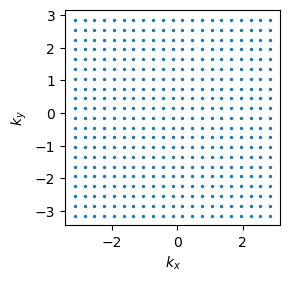

In [370]:
fig1=utils_auto.plot_kspace(kspace=ham.k_space)

## Task 2: Check energy dispersion for non-interacting term

In [ ]:
ham = module.HartreeFockHamiltonian(N_shell=10,)
setattr(ham,'Delta',5.0)


In [372]:
h_nonint = ham.generate_non_interacting()

In [373]:
wf,en= HF.diagonalize(h_nonint) # or HF.diagonalize

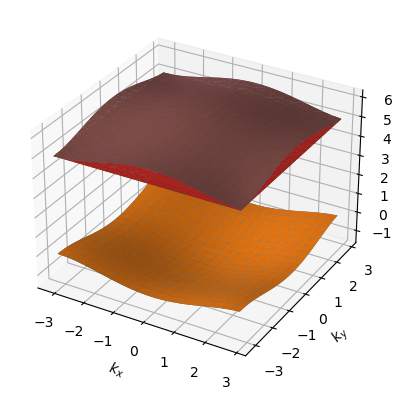

In [374]:
utils_auto.plot_2d_bandstructure(ham,en)

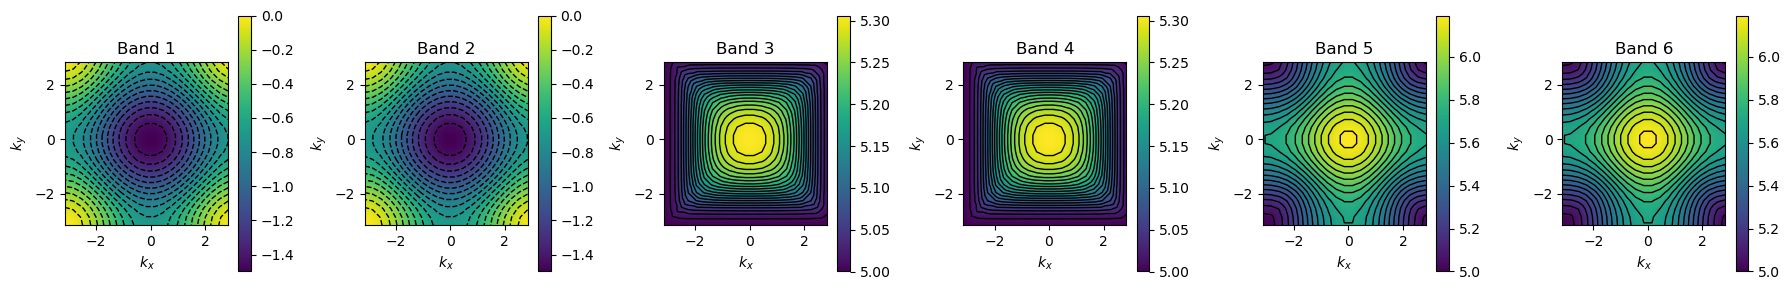

In [375]:
fig2=utils_auto.plot_2d_false_color_map(ham,en)

## Task 3: Infinitesemial U limit

In [376]:
ham_int= module.HartreeFockHamiltonian(N_shell=10,  
parameters={'Delta':5,'U_p':0,'U_d':0,'V_pp':0,'V_pd':1e-5,'t_pd':1,'t_pp':1},filling_factor=1/3)

In [377]:
wf,en= HF.diagonalize(ham_int.generate_non_interacting())
exp_val= HF.get_exp_val(wf,en,1/3,0)
exp_val=HF.unflatten(exp_val,ham_int.D,ham.N_k)

In [378]:
wf_int, en_int, exp_val= HF.solve(ham_int,exp_val,100)

Convergence reached at iteration 3


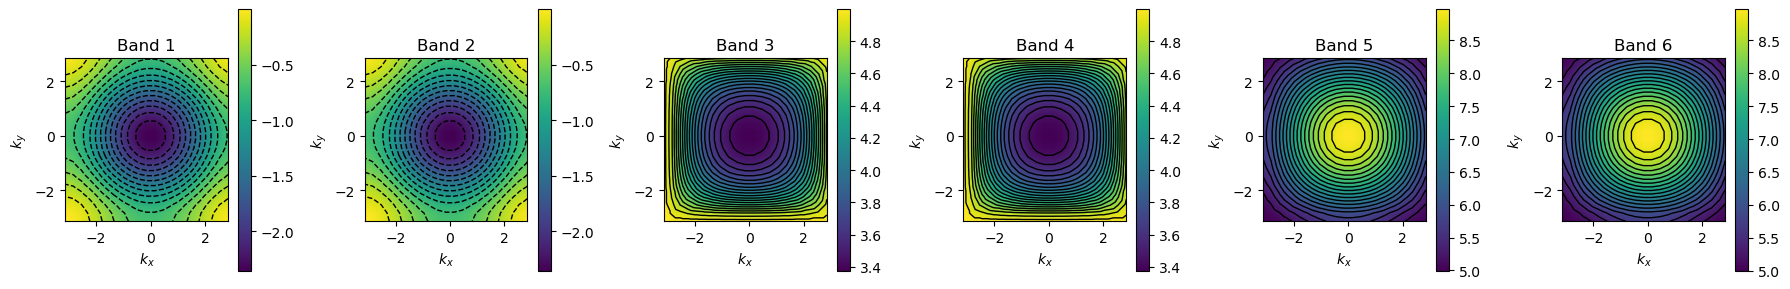

In [379]:
fig3=utils_auto.plot_2d_false_color_map(ham_int,en_int)

## Task 4: Large U limit

In [363]:
ham_int= module.HartreeFockHamiltonian(N_shell=10,  parameters={'Delta':5,'U_p':0,'U_d':0,'V_pp':0,'V_pd':1e5,'t_pd':1,'t_pp':1},filling_factor=1/3)


In [364]:
h_nonint=ham_int.generate_non_interacting()
wf,en=HF.diagonalize(h_nonint)
exp_val=HF.get_exp_val(wf,en,1/3,0)
exp_val=HF.unflatten(exp_val,ham_int.D,ham.N_k)

In [365]:
wf_int, en_int, exp_val_int=HF.solve(ham_int,exp_val,99)

Convergence reached at iteration 2


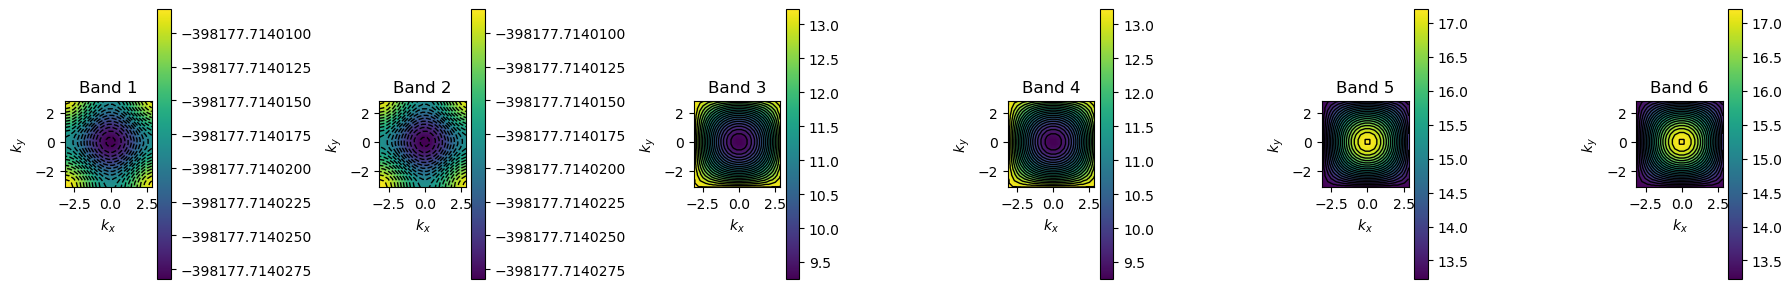

In [366]:
fig4=utils_auto.plot_2d_false_color_map(ham_int,en_int)

In [368]:
utils_auto.print_gap(ham_int,exp_val,en_int,2)

Gap is 398186.96
U/T is 25474.16
mean_U is 25918.04


# Auto eval

## Task 1

In [380]:
result1 = utils_auto.vision_eval(
    fig=fig1, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics1.md', image='image1.md', paper=paper)
    )


#################### THINKING ####################

Let me carefully analyze
Let me carefully analyze what's shown in the image and compare it to the rubric:

The image shows a grid of blue dots arranged in a uniform pattern within a square boundary. The x-axis is labeled as k_x and ranges approximately from -3 to 3, and the y-axis is labeled as k_y and also ranges approximately from -3 to 3. This appears to be a momentum space mesh in the first Brillouin zone.

According to the rubric, I need to check:

1. If this image shows a momentum space mesh in the first Brillouin zone of the concerned problem.
2. The point group symmetry of the system.

Looking at the problem description, we have a Hamiltonian with a square lattice. For a square lattice, the first Brillouin zone should be a square in momentum space, centered at the origin, with boundaries at ±π in both k_x and k_y directions (assuming the lattice constant a = 1).

The image indeed shows a square region of momentum space with a

In [381]:
answer1=utils_auto.extract_result_content(result1['text'])

## Task 2

In [382]:
result2 = utils_auto.vision_eval(
    fig=fig2, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics2.md', image='image2.md', paper=paper)
    )


#################### THINKING ####################

Let's analyze
Let's analyze the image according to the rubric.

The image shows 6 band structure plots labeled Band 1 through Band 6. Each plot displays the band structure in the first Brillouin zone with false color and contour lines. The horizontal and vertical axes are labeled k_x and k_y, and range from approximately -3 to 3.

1. First, identify the shape of the Brillouin zone boundary and confirm it matches what's expected for a square lattice.

Looking at the plots, the Brillouin zone appears to be square-shaped, with boundaries at constant values of k_x and k_y. This is consistent with a square lattice, which should have a square-shaped first Brillouin zone.

2. Next, examine the symmetry of the energy distribution shown by the false color plot:

2.1 Identify the highest energy regions (yellow):
- In Band 1 and Band 2: The highest energy (yellow) is at the edges of the plot
- In Band 3 and Band 4: The highest energy (yellow) i

In [383]:
answer2=utils_auto.extract_result_content(result2['text'])

## Task 3

In [394]:
result3 = utils_auto.vision_eval(
    fig=fig3, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics3.md', image='image3.md', paper=paper)
    )


#################### THINKING ####################

Let me
Let me analyze the image provided according to the rubric. I'll go through each point systematically.

1. Identifying the shape of the Brillouin zone boundary:
Looking at all six band plots, I can see that the Brillouin zone boundary forms a square shape, with $k_x$ and $k_y$ axes ranging from approximately -3 to 3 (with the boundary appearing at around ±2.5). This square shape is consistent with what is expected for a square lattice, which is mentioned in the problem statement.

2. Examining the symmetry of the energy distribution:

2.1 Highest energy regions (yellow):
- Bands 1 & 2: The highest energy regions (yellow-green) appear at the corners of the Brillouin zone.
- Bands 3 & 4: The highest energy regions appear near the edges of the zone.
- Bands 5 & 6: The highest energy regions (bright yellow) appear at the center of the Brillouin zone.

2.2 Pattern of energy variation:
- Bands 1 & 2: Circular/radial pattern centered 

In [395]:
answer3=utils_auto.extract_result_content(result3['text'])

## Task 4

In [396]:
result4 = utils_auto.vision_eval(
    fig=fig4, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics4.md', image='image4.md', paper=paper,U_int='4*V_pd = 4e5')
    )


#################### THINKING ####################

Let me analyze
Let me analyze the image and evaluate it against the rubric for a Hartree-Fock calculation of a condensed matter physics system.

The image shows 6 panels labeled Band 1 through Band 6, each displaying a false-color plot of what appears to be energy bands in momentum space (k-space) for a square lattice system.

Let's go through the rubric points systematically:

1. **Brillouin zone boundary shape**: 
The plots show a square-shaped Brillouin zone with boundaries approximately at kx, ky = -2.5 to 2.5. This is consistent with the expected square lattice structure mentioned in the problem. The first Brillouin zone for a square lattice should be square, so this matches expectations.

2. **Symmetry analysis**:

2.1 **Highest energy regions (yellow)**: 
- In Bands 1-4, the highest energy regions appear to be in concentric rings/contours.
- In Bands 5-6, the highest energy regions (yellow) are concentrated near the center of 

In [398]:
answer4=utils_auto.extract_result_content(result4['text'])

In [399]:
utils_auto.save_final_answer(paper,trial_idx,answer1,answer2,answer3,answer4)

Final answer record for '1' saved to final_answer.yaml
